# Code

In [15]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

# load data
ws = 2
def data_loader(fname):

    data = np.loadtxt(fname, skiprows=1, dtype='float')

    #energy =  data[:,0]
    energy =  data[int(ws/2)-1:int(-1*ws/2),0]

    pdos_up = []
    pdos_dw = []
    arr_up = data[:,1]
    arr_dw = data[:,2]
    i = 0
    while i < len(arr_up)-ws + 1:
        window = arr_up[i : i + ws]
        avg = sum(window)/ws
        pdos_up.append(avg)
        i += 1
    i = 0
    while i < len(arr_dw)-ws + 1:
        window = arr_dw[i : i + ws]
        avg = sum(window)/ws
        pdos_dw.append(-1*avg)
        i += 1

    return energy, pdos_up, pdos_dw
def plot_pdos(isRelaxed, qval, Uval):
    if isRelaxed:
        fnameprefix = f"relaxed/{qval}/{Uval}/6.pdos_files"
        title = f"relaxed"
        _, pdos_tot_up, pdos_tot_dw = data_loader(f'{fnameprefix}/Cu_vac_in_ZnS.{qval}.U.{Uval}.pdos_tot')
    else:
        fnameprefix = f"unrelaxed/{qval}/6.pdos_files"
        title = f"unrelaxed"
        _, pdos_tot_up, pdos_tot_dw = data_loader(f'{fnameprefix}/Cu_vac_in_ZnS.{qval}.unrlxd.pdos_tot')

    energy, pdos_Cu_3d_up, pdos_Cu_3d_dw = data_loader(f'{fnameprefix}/Cu.pdos')
    _, pdos_S_up, pdos_S_dw = data_loader(f'{fnameprefix}/S.pdos')
    _, pdos_Zn_up, pdos_Zn_dw = data_loader(f'{fnameprefix}/Zn.pdos')

    fermi = 5.5452
    my_dpi=99
    fig,ax = plt.subplots(figsize=(777/my_dpi,657/my_dpi), dpi=my_dpi)

    # plot data
    ax.plot(energy - fermi, pdos_S_up, linewidth=1, color='#006699', label='S')
    ax.plot(energy - fermi, pdos_S_dw, linewidth=1, color='#006699')

    ax.plot(energy - fermi, pdos_Zn_up, linewidth=1, color='g', label='Zn')
    ax.plot(energy - fermi, pdos_Zn_dw, linewidth=1, color='g')

    ax.plot(energy - fermi, pdos_Cu_3d_up, linewidth=1, color='r', label='Cu')
    ax.plot(energy - fermi, pdos_Cu_3d_dw, linewidth=1, color='r')

    ax.plot(energy - fermi, pdos_tot_up, linewidth=1, color='k', label='total')
    ax.plot(energy - fermi, pdos_tot_dw, linewidth=1, color='k')
    ax.set_xlabel('Energy (eV)')
    ax.set_ylabel('DOS')
    ax.axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    ax.fill_between(energy - fermi, 0, pdos_S_up, where=(energy - fermi < 0), facecolor='#006699', alpha=0.25)
    ax.fill_between(energy - fermi, 0, pdos_S_dw, where=(energy - fermi < 0), facecolor='#006699', alpha=0.25)
    ax.fill_between(energy - fermi, 0, pdos_Zn_up, where=(energy - fermi < 0), facecolor='g', alpha=0.25)
    ax.fill_between(energy - fermi, 0, pdos_Zn_dw, where=(energy - fermi < 0), facecolor='g', alpha=0.25)
    ax.fill_between(energy - fermi, 0, pdos_Cu_3d_up, where=(energy - fermi < 0), facecolor='r', alpha=0.25)
    ax.fill_between(energy - fermi, 0, pdos_Cu_3d_dw, where=(energy - fermi < 0), facecolor='r', alpha=0.25)
    ax.fill_between(energy - fermi, 0, pdos_tot_up, where=(energy - fermi < 0), facecolor='k', alpha=0.25)
    ax.fill_between(energy - fermi, 0, pdos_tot_dw, where=(energy - fermi < 0), facecolor='k', alpha=0.25)
    ax.legend(frameon=False)
    ax.set_xticks(np.arange(-12,6,1))

    # adjust subplot layout
    plt.subplots_adjust(hspace=0.4)
    plt.xlim(-2, 4)
    plt.ylim(-50, 50)
    # set the overall title
    plt.suptitle(r"Projected DOS for $\mathrm{Cu_{Zn}}$-$\mathrm{\mathit{V}_{S}}$ in ZnS, U=2 eV " + f"({qval}, {title})")
    plt.tight_layout()
    # show the plot
    plt.show()

## PDOS

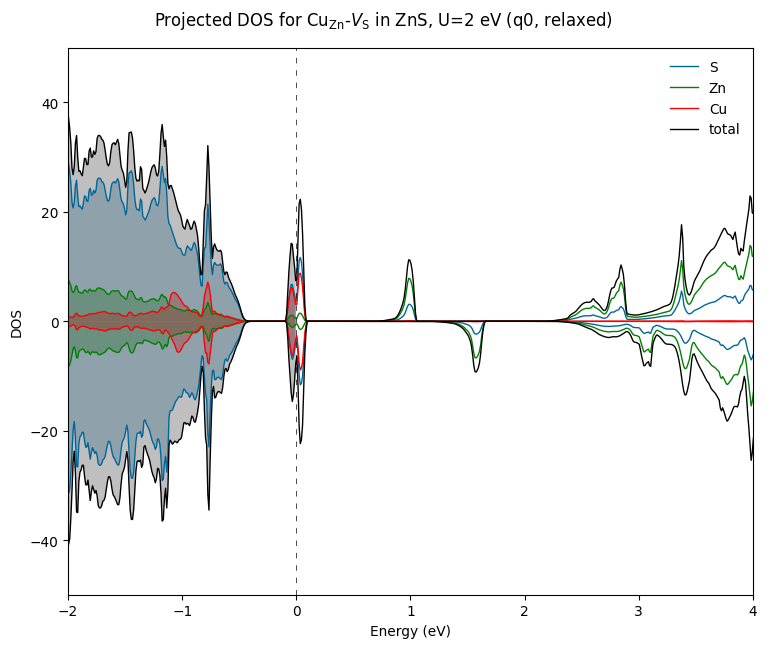

In [16]:
plot_pdos(True, "q0", "2")